In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import keras as k
import cv2

Using TensorFlow backend.


In [16]:
import glob
x1 = [cv2.imread(file) for file in glob.glob('../nndl/devanagari-character-dataset/nhcd/nhcd/vowels/1/*.jpg')]
x2 = [cv2.imread(file) for file in glob.glob('../nndl/devanagari-character-dataset/nhcd/nhcd/vowels/2/*.jpg')]
X=np.concatenate((np.array(x1), np.array(x2)), axis=0)
Y=np.concatenate((np.zeros(len(x1)),np.ones(len(x2))),axis=0)
print(X.shape)
X=X.astype('float32')/255.0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,shuffle= True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
from keras.utils import to_categorical
y_train = to_categorical(y_train,2)
y_test= to_categorical(y_test,2)

(442, 28, 28, 3)
(353, 28, 28, 3)
(353,)
(89, 28, 28, 3)
(89,)


In [13]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, GlobalAveragePooling2D,Reshape
from keras.layers import Flatten, Dense,UpSampling2D

model = Sequential()
model.add(Convolution2D(32, (2, 2), input_shape=(28,28,3),activation='relu', padding="same"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(2,activation="sigmoid"))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total para

In [14]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
bye = model.fit(X_train,y_train, validation_split = 0.2, epochs=10, batch_size=32, verbose=1)

Train on 282 samples, validate on 71 samples
Epoch 1/10
282/282 [==============================] - 3s 12ms/step - loss: 1.2531 - acc: 0.4504 - val_loss: 0.7179 - val_acc: 0.5000
Epoch 2/10
282/282 [==============================] - 2s 6ms/step - loss: 0.7017 - acc: 0.5035 - val_loss: 0.6828 - val_acc: 0.5000
Epoch 3/10
282/282 [==============================] - 2s 6ms/step - loss: 0.6475 - acc: 0.6578 - val_loss: 0.6431 - val_acc: 0.6408
Epoch 4/10
282/282 [==============================] - 2s 6ms/step - loss: 0.6026 - acc: 0.7110 - val_loss: 0.5944 - val_acc: 0.7324
Epoch 5/10
282/282 [==============================] - 2s 7ms/step - loss: 0.5635 - acc: 0.7482 - val_loss: 0.5572 - val_acc: 0.7958
Epoch 6/10
282/282 [==============================] - 2s 6ms/step - loss: 0.4871 - acc: 0.8351 - val_loss: 0.5211 - val_acc: 0.7887
Epoch 7/10
282/282 [==============================] - 2s 6ms/step - loss: 0.4284 - acc: 0.8457 - val_loss: 0.4640 - val_acc: 0.8169
Epoch 8/10
282/282 [==========

In [18]:
bye = model.fit(X_train,y_train, validation_split = 0.2, epochs=20, batch_size=32, verbose=1)

Train on 282 samples, validate on 71 samples
Epoch 1/20
282/282 [==============================] - 2s 7ms/step - loss: 0.2622 - acc: 0.9025 - val_loss: 0.3614 - val_acc: 0.8451
Epoch 2/20
282/282 [==============================] - 2s 6ms/step - loss: 0.2323 - acc: 0.9202 - val_loss: 0.3415 - val_acc: 0.8662
Epoch 3/20
282/282 [==============================] - 2s 6ms/step - loss: 0.2135 - acc: 0.9202 - val_loss: 0.3225 - val_acc: 0.8662
Epoch 4/20
282/282 [==============================] - 2s 6ms/step - loss: 0.1774 - acc: 0.9486 - val_loss: 0.3155 - val_acc: 0.8592
Epoch 5/20
282/282 [==============================] - 2s 6ms/step - loss: 0.1564 - acc: 0.9592 - val_loss: 0.3128 - val_acc: 0.8451
Epoch 6/20
282/282 [==============================] - 2s 6ms/step - loss: 0.1500 - acc: 0.9610 - val_loss: 0.2888 - val_acc: 0.8732
Epoch 7/20
282/282 [==============================] - 2s 5ms/step - loss: 0.1313 - acc: 0.9734 - val_loss: 0.2785 - val_acc: 0.8732
Epoch 8/20
282/282 [===========

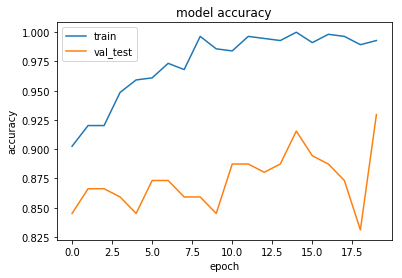

In [19]:
import matplotlib.pyplot as plt
plt.plot(bye.history['acc'])
plt.plot(bye.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_test'], loc='upper left')
plt.show()


Predicted 1  Actual 1
Predicted 0  Actual 0
Predicted 1  Actual 1
Predicted 1  Actual 1
Predicted 0  Actual 0
Predicted 1  Actual 1
Predicted 0  Actual 1
Predicted 1  Actual 1
Predicted 0  Actual 0


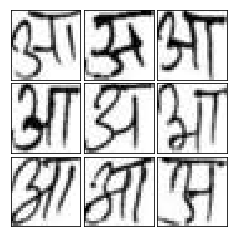

In [23]:
output=model.predict(X_test)
fig = plt.figure(figsize=(3,3))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(cv2.cvtColor(np.reshape(X_test[i],[28,28,3]), cv2.COLOR_BGR2RGB)) # plot the image
    print("Predicted",np.argmax(output[i])," Actual",np.argmax(y_test[i]))
    
#0 - a
#1 - aa


In [24]:
from sklearn.metrics import accuracy_score as acc
y_given,y_pred=[],[]
for i in range(0,len(y_test)):
    y_given.append(np.argmax(y_test[i]))
    y_pred.append(np.argmax(output[i]))
print("Test Accuracy:",acc(y_given,y_pred)*100)


Test Accuracy: 88.7640449438


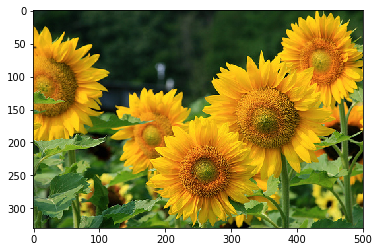

In [19]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import cv2
import numpy as np
# Read Images 
img = mpimg.imread('../nndl/flowers-recognition/flowers/sunflower/1008566138_6927679c8a.jpg') 
#rgb = bgr[...,::-1]

# Output Images 
plt.imshow(np.array(img),cmap='hsv') 
plt.show()

In [14]:
print(img.shape)
print(img[:,:])

(330, 500, 3)
[[[ 34  49  42]
  [ 33  49  39]
  [ 33  51  39]
  ..., 
  [ 16  42  13]
  [ 15  41  12]
  [ 15  41  12]]

 [[ 31  48  40]
  [ 30  47  37]
  [ 31  49  37]
  ..., 
  [ 25  43  17]
  [ 24  42  16]
  [ 23  41  15]]

 [[ 29  46  38]
  [ 28  45  35]
  [ 28  48  36]
  ..., 
  [ 25  48  19]
  [ 23  48  18]
  [ 22  47  17]]

 ..., 
 [[ 91 140  31]
  [ 98 142  91]
  [ 95 123  82]
  ..., 
  [ 47  96  49]
  [ 46  95  48]
  [ 47  94  48]]

 [[ 87 141  19]
  [ 98 141  52]
  [ 90 123  80]
  ..., 
  [ 43  97  48]
  [ 44  96  50]
  [ 49  92  49]]

 [[ 87 141  19]
  [102 145  56]
  [100 133  90]
  ..., 
  [ 44  96  48]
  [ 47  94  50]
  [ 50  91  47]]]


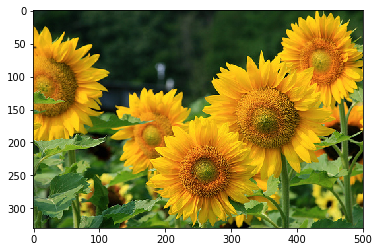

In [20]:
plt.imshow(np.array(img),cmap='hsv') 